In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
df =  pd.read_csv("F:\DATA SCIENCE\MACHINE LEARNING\K Means Clustering\clustering - loan approval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


- Here, we will consider only 2 features for making clusters for easy calculation and visualization purpose.
- We will consider 'ApplicantIncome' and 'LoanAmount' for our clustering problem

In [66]:
D = df[['ApplicantIncome','LoanAmount']]
D.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


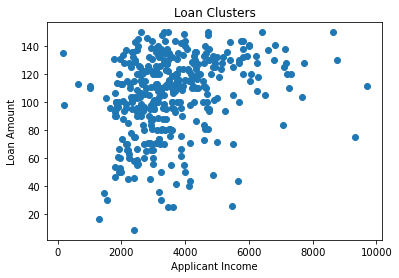

In [67]:
# Plotting D 
plt.scatter(x = 'ApplicantIncome', y = 'LoanAmount',data = D)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Clusters')
plt.show()

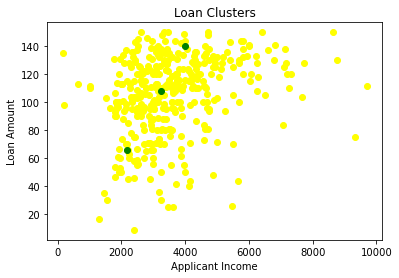

In [68]:
# Applying K- Means algorithm using logic (stepwise) to form clusters as per these two features customers.

# Input required :- Select no. of clusters 
k = 3

# Step - 1 : Select k random points from the dataset as cluster centroids 
Centroids = D.sample(k)
plt.scatter(x = 'ApplicantIncome', y = 'LoanAmount',data = D , c = 'yellow')
plt.scatter(x = 'ApplicantIncome', y = 'LoanAmount',data = Centroids, c = 'green')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Clusters')
plt.show()

In [69]:
# Step - 2 : Calculate Euclidean Distance of each point with the centroids
ED = []
ED_cen1 = []
ED_cen2 = []
ED_cen3 = []
for i in D.itertuples():
    for j in Centroids.itertuples():
        dist = np.sqrt((i[1] - j[1])**2 + (i[2] - j[2])**2)
        ED.append(dist)
for i in range(0,len(ED),3):
    ED_cen1.append(ED[i])
for j in range(1,len(ED),3):
    ED_cen2.append(ED[j])
for k in range(2,len(ED),3):
    ED_cen3.append(ED[k])
data = D
data['ED w.r.t. centroid 1'] = ED_cen1
data['ED w.r.t. centroid 2'] = ED_cen2
data['ED w.r.t. centroid 3'] = ED_cen3
data.head()

,ApplicantIncome,LoanAmount,ED w.r.t. centroid 1,ED w.r.t. centroid 2,ED w.r.t. centroid 3
0,4583,128.0,583.123486,2405.799036,1351.148030
1,3000,66.0,1002.734262,822.000000,235.771075
2,2583,120.0,1417.141136,408.584141,649.110930
3,6000,141.0,2000.000250,3822.735800,2768.196705
4,2333,95.0,1667.607268,157.689568,899.093988


In [70]:
# Step - 3 : Assign the points to the cluster where the point is having the shortest distance with the cluster's centroid
cluster = []
for i in D.itertuples():
    if i[3] < i[4]  and i[3] < i[5]:
        cluster.append(1)
    if i[4] < i[3] and i[4] < i[5]:
        cluster.append(2)
    if i[5] < i[3] and i[5] < i[4]:
        cluster.append(3)
data['cluster'] = cluster
data.head()

,ApplicantIncome,LoanAmount,ED w.r.t. centroid 1,ED w.r.t. centroid 2,ED w.r.t. centroid 3,cluster
0,4583,128.0,583.123486,2405.799036,1351.148030,1
1,3000,66.0,1002.734262,822.000000,235.771075,3
2,2583,120.0,1417.141136,408.584141,649.110930,2
3,6000,141.0,2000.000250,3822.735800,2768.196705,1
4,2333,95.0,1667.607268,157.689568,899.093988,2


In [77]:
# Step - 4 : Calculate mean of each newly formed cluster and assign it as new centroid
Centroids_New = data.groupby('cluster')[['ApplicantIncome','LoanAmount']].apply(lambda x : np.mean(x))
Centroids_New

,ApplicantIncome,LoanAmount
cluster,,
1,4908.326797,113.326797
2,2157.183486,96.559633
3,3174.907563,101.983193


In [79]:
# Step - 5 : Repeat steps 2 - 4 till convergence (Cluster centers / centroids do not change (or) till wcss dist. becomes min. and const.)
diff = 1
j = 0
while(diff != 0):
    ED = []
    ED_cen1 = []
    ED_cen2 = []
    ED_cen3 = []
    for i in D.itertuples():
        for j in Centroids.itertuples():
            dist = np.sqrt((i[1] - j[1])**2 + (i[2] - j[2])**2)
            ED.append(dist) 
    for i in range(0,len(ED),3):
        ED_cen1.append(ED[i])
    for j in range(1,len(ED),3):
        ED_cen2.append(ED[j])
    for k in range(2,len(ED),3):
        ED_cen3.append(ED[k])
    data = D
    data['ED w.r.t. centroid 1'] = ED_cen1
    data['ED w.r.t. centroid 2'] = ED_cen2
    data['ED w.r.t. centroid 3'] = ED_cen3 # Repeating step -2
    cluster = []
    for i in D.itertuples():
        if i[3] < i[4]  and i[3] < i[5]:
            cluster.append(1)
        if i[4] < i[3] and i[4] < i[5]:
            cluster.append(2)
        if i[5] < i[3] and i[5] < i[4]:
            cluster.append(3)
    data['cluster'] = cluster # Repeating step - 3
    Centroids_New = data.groupby('cluster')[['ApplicantIncome','LoanAmount']].apply(lambda x : np.mean(x)) # Repeating step -4
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_New['ApplicantIncome'] - Centroids['ApplicantIncome']).sum() + (Centroids_New['LoanAmount'] - Centroids['LoanAmount']).sum()
        print(diff)
    Centroids = data.groupby('cluster')[['ApplicantIncome','LoanAmount']].apply(lambda x : np.mean(x))

522.8026187377717
420.62500894962375
257.4203791040944
207.02731030932063
277.68763984371935
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


The iterations stop when difference between previous cluster centroid and new cluster centroid is 0.

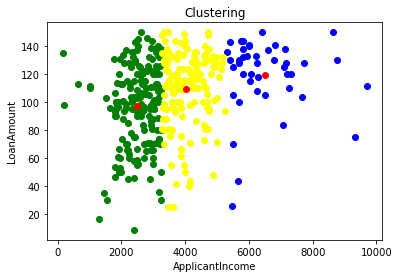

In [88]:
# Visualizing the clusters of these 2 features
color = ['blue','green','yellow']
k= 3
for i in range(0,k):
    data_k = data[data['cluster'] == i+1]
    plt.scatter(data_k['ApplicantIncome'], data_k['LoanAmount'], c = color[i])
plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'],c = 'red')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Clustering')
plt.show()